In [131]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [132]:
train = pd.read_csv('train.csv',header=None)
test = pd.read_csv('t10k.csv',header=None)


In [133]:
train_input = train.iloc[:,1:]
train_input
train_target = train[0]
train_target
test_input = test.iloc[:,1:]
test_target = test[0]

In [134]:
train_scaled = train_input.to_numpy().reshape(-1,28,28,1)/255
test_scaled = test_input.to_numpy().reshape(-1,28,28,1)/255
train_scaled.shape

(1001, 28, 28, 1)

In [135]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [136]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1))) # 1차
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))    # 2차
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best2_model.keras')    # 포인트 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(test_scaled,test_target),callbacks=(checkpoint_cb,early_stopping_cb))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2882 - loss: 2.0788 - val_accuracy: 0.6747 - val_loss: 1.0387
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.9116 - val_accuracy: 0.8323 - val_loss: 0.6269
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8244 - loss: 0.6074 - val_accuracy: 0.8782 - val_loss: 0.4198
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8894 - loss: 0.4055 - val_accuracy: 0.9002 - val_loss: 0.3834
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9120 - loss: 0.3401 - val_accuracy: 0.9022 - val_loss: 0.3152
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9348 - loss: 0.2387 - val_accuracy: 0.9301 - val_loss: 0.2535
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9403 - loss: 0.1981 - val_accuracy: 0.9202 - val_loss: 0.2544
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9608 - loss: 0.1613 - val_accuracy: 0.9361 - val_loss

10

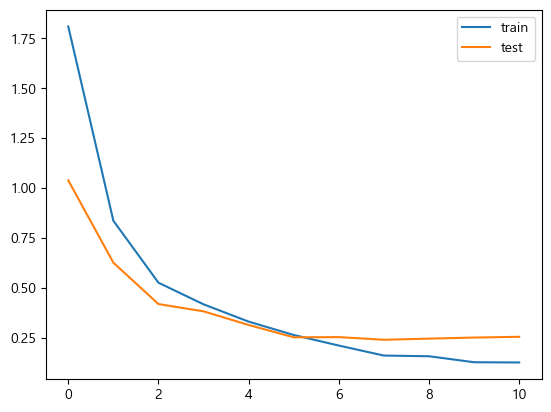

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
early_stopping_cb.stopped_epoch

In [139]:
model.evaluate(test_scaled,test_target)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1836 


[0.24106447398662567, 0.9361277222633362]

In [140]:
# ### CNN 합성곱신경망
# # 데이터 전처리
# # train_scaled = train_input.reshape(-1,28,28,1)/255
# # test_scaled = test_input.reshape(-1,28,28,1)/255.0

# # 모델결정 
# model = keras.Sequential()
# # 1차합성곱 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
# # 풀링 
# model.add(keras.layers.MaxPooling2D(2))

# # 2차합성곱 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
# # 풀링 
# model.add(keras.layers.MaxPooling2D(2))

# # Flatten 추가
# model.add(keras.layers.Flatten())
# # 덴스 및 드랍
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10,activation='softmax'))
# model.summary()
# # 모델설정        
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# # 모델체크포인트   
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# # 조기종료        
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
# # 훈련(히스토리)   
# history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# # 모델평가        
# model.evaluate(test_scaled,test_target)